### Environment setup and initial state 
We are importing Gym, intiilizign the Taxi v3 with a render mode of human. 

In [ ]:
import gym

env = gym.make("Taxi-v3", render_mode='human')
print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")

state, info = env.reset()
print(f"Initial State: {state}")

taxi_row, taxi_col, passenger_loc, destination = env.decode(state)
print(f"Taxi Position: ({taxi_row}, {taxi_col})")
print(f"Passenger Location: {passenger_loc}")
print(f"Destination: {destination}")

print(env.render())


Action Space: Discrete(6)
Observation Space: Discrete(500)
Initial State: 303
Taxi Position: (3, 0)
Passenger Location: 0
Destination: 3
None


: 

### Random Policy
For the same environment of the Taxi, I am using random policy and it is going to run until it is done. 

In [ ]:
total_reward = 0
steps = 0
state, info = env.reset()
done = False
while not done:
    action = env.action_space.sample()
    next_state, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    steps += 1
    env.render()
    state = next_state
    done = terminated or truncated
print(f"Total reward: {total_reward}, Steps taken: {steps}")
env.close()


c:\Users\denic\miniconda3\envs\SEM1-CB\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Total reward: -803, Steps taken: 200


### Q- learning Agent 
I am implementing a full Q-learning loop, initializing a Q-table and also using epsilon-greedy startegy. 

c:\Users\denic\miniconda3\envs\SEM1-CB\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 0/1000 - Total Reward: -406 - Success Rate: 0.00
Episode 100/1000 - Total Reward: -307 - Success Rate: 0.00
Episode 200/1000 - Total Reward: -226 - Success Rate: 0.00
Episode 300/1000 - Total Reward: -190 - Success Rate: 0.00
Episode 400/1000 - Total Reward: -136 - Success Rate: 0.00
Episode 500/1000 - Total Reward: -118 - Success Rate: 0.01
Episode 600/1000 - Total Reward: -154 - Success Rate: 0.01
Episode 700/1000 - Total Reward: -82 - Success Rate: 0.03
Episode 800/1000 - Total Reward: -109 - Success Rate: 0.04
Episode 900/1000 - Total Reward: 2 - Success Rate: 0.05

Training finished after 1000 episodes
Average reward per episode: -131.81
Average steps per episode: 78.00
Success rate: 0.07


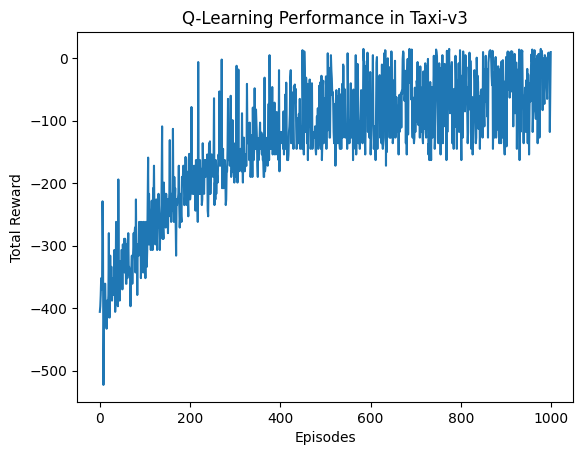

In [ ]:
import numpy as np

class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.99, epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.995):
        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
    
    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()  
        else:
            return np.argmax(self.q_table[state, :]) 
    
    def update_q_table(self, state, action, reward, next_state):
        old_q_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state])
        new_q_value = old_q_value + self.learning_rate * (reward + self.discount_factor * next_max - old_q_value)
        self.q_table[state, action] = new_q_value
    
    def train(self, total_episodes=1000, max_steps=100):
        rewards = []
        success_rate = 0
        total_steps = 0

        for episode in range(total_episodes):
            state, info = self.env.reset()
            done = False
            total_reward = 0
            episode_steps = 0

            while not done and episode_steps < max_steps:
                action = self.choose_action(state)
                next_state, reward, terminated, truncated, info = self.env.step(action)
                self.update_q_table(state, action, reward, next_state)
                state = next_state
                total_reward += reward
                episode_steps += 1

                if terminated or truncated:
                    done = True
            
            rewards.append(total_reward)
            total_steps += episode_steps
            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay

            if total_reward >= 0: 
                success_rate += 1

            if episode % 100 == 0:
                print(f"Episode {episode}/{total_episodes} - Total Reward: {total_reward} - Success Rate: {success_rate/(episode+1):.2f}")
        
        avg_reward = np.mean(rewards)
        avg_steps = total_steps / total_episodes
        success_rate = success_rate / total_episodes

        print(f"\nTraining finished after {total_episodes} episodes")
        print(f"Average reward per episode: {avg_reward:.2f}")
        print(f"Average steps per episode: {avg_steps:.2f}")
        print(f"Success rate: {success_rate:.2f}")
        
        return rewards

env = gym.make('Taxi-v3')
agent = QLearningAgent(env)
rewards = agent.train()
import matplotlib.pyplot as plt
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Q-Learning Performance in Taxi-v3')
plt.show()


### Finetuning of Q- learniing Agent
I am now going to change the learning rate, discount factor, epsilon decay.  


--- Running Config 1 ---
Episode 0/500 - Total Reward: -442 - Success Rate: 0.00


c:\Users\denic\miniconda3\envs\SEM1-CB\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 100/500 - Total Reward: -343 - Success Rate: 0.00
Episode 200/500 - Total Reward: -208 - Success Rate: 0.00
Episode 300/500 - Total Reward: -88 - Success Rate: 0.00
Episode 400/500 - Total Reward: -110 - Success Rate: 0.00

Training finished after 500 episodes
Average reward per episode: -194.17
Average steps per episode: 92.13
Success rate: 0.01

--- Running Config 2 ---
Episode 0/500 - Total Reward: -442 - Success Rate: 0.00
Episode 100/500 - Total Reward: -217 - Success Rate: 0.00
Episode 200/500 - Total Reward: -38 - Success Rate: 0.01
Episode 300/500 - Total Reward: -26 - Success Rate: 0.07
Episode 400/500 - Total Reward: -11 - Success Rate: 0.13

Training finished after 500 episodes
Average reward per episode: -100.82
Average steps per episode: 56.49
Success rate: 0.21

--- Running Config 3 ---
Episode 0/500 - Total Reward: -424 - Success Rate: 0.00
Episode 100/500 - Total Reward: -325 - Success Rate: 0.00
Episode 200/500 - Total Reward: -397 - Success Rate: 0.00
Episode 

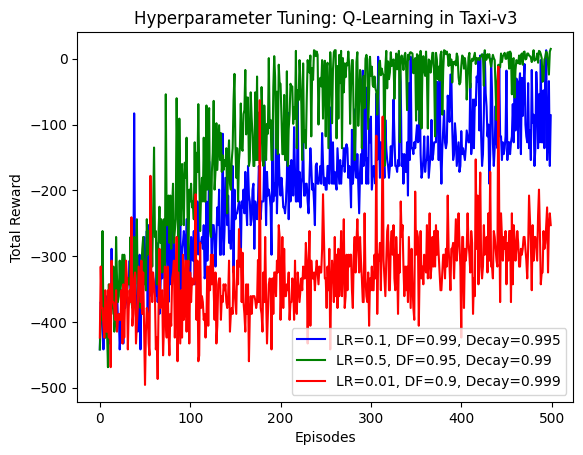

In [ ]:
param_sets = [
    {"learning_rate": 0.1, "discount_factor": 0.99, "epsilon_decay": 0.995},
    {"learning_rate": 0.5, "discount_factor": 0.95, "epsilon_decay": 0.99},
    {"learning_rate": 0.01, "discount_factor": 0.9, "epsilon_decay": 0.999},
]

colors = ['blue', 'green', 'red']
labels = []

for i, params in enumerate(param_sets):
    print(f"\n--- Running Config {i+1} ---")
    agent = QLearningAgent(
        env=gym.make('Taxi-v3'),
        learning_rate=params["learning_rate"],
        discount_factor=params["discount_factor"],
        epsilon_decay=params["epsilon_decay"]
    )
    rewards = agent.train(total_episodes=500)
    plt.plot(rewards, color=colors[i])
    label = f"LR={params['learning_rate']}, DF={params['discount_factor']}, Decay={params['epsilon_decay']}"
    labels.append(label)

plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Hyperparameter Tuning: Q-Learning in Taxi-v3")
plt.legend(labels)
plt.show()


Episode 0/1000 - Total Reward: -505 - Success Rate: 0.00
Episode 100/1000 - Total Reward: -217 - Success Rate: 0.00
Episode 200/1000 - Total Reward: -172 - Success Rate: 0.01
Episode 300/1000 - Total Reward: 11 - Success Rate: 0.08
Episode 400/1000 - Total Reward: 4 - Success Rate: 0.17
Episode 500/1000 - Total Reward: -2 - Success Rate: 0.28
Episode 600/1000 - Total Reward: 2 - Success Rate: 0.37
Episode 700/1000 - Total Reward: 8 - Success Rate: 0.44
Episode 800/1000 - Total Reward: 3 - Success Rate: 0.50
Episode 900/1000 - Total Reward: 4 - Success Rate: 0.54

Training finished after 1000 episodes
Average reward per episode: -47.79
Average steps per episode: 35.95
Success rate: 0.59


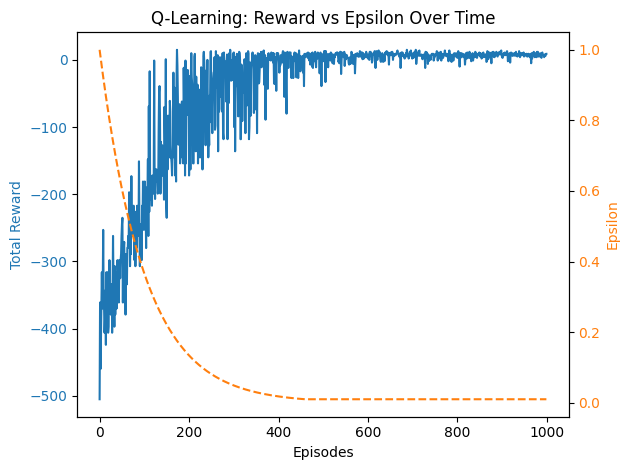

: 

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

class QLearningAgent:
    def __init__(self, env, learning_rate=0.5, discount_factor=0.95, epsilon=1.0,
                 epsilon_min=0.01, epsilon_decay=0.99):
        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
    
    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table[state, :])
    
    def update_q_table(self, state, action, reward, next_state):
        old_q_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state])
        new_q_value = old_q_value + self.learning_rate * (
            reward + self.discount_factor * next_max - old_q_value)
        self.q_table[state, action] = new_q_value
    
    def train(self, total_episodes=1000, max_steps=100):
        rewards = []
        epsilons = []
        success_rate = 0
        total_steps = 0

        for episode in range(total_episodes):
            state, _ = self.env.reset()
            done = False
            total_reward = 0
            episode_steps = 0

            while not done and episode_steps < max_steps:
                action = self.choose_action(state)
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                self.update_q_table(state, action, reward, next_state)
                state = next_state
                total_reward += reward
                episode_steps += 1
                done = terminated or truncated

            rewards.append(total_reward)
            epsilons.append(self.epsilon)
            total_steps += episode_steps

            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay

            if total_reward >= 0:
                success_rate += 1

            if episode % 100 == 0:
                print(f"Episode {episode}/{total_episodes} - Total Reward: {total_reward} - Success Rate: {success_rate / (episode + 1):.2f}")
        
        print(f"\nTraining finished after {total_episodes} episodes")
        print(f"Average reward per episode: {np.mean(rewards):.2f}")
        print(f"Average steps per episode: {total_steps / total_episodes:.2f}")
        print(f"Success rate: {success_rate / total_episodes:.2f}")

        return rewards, epsilons

# Run training
env = gym.make('Taxi-v3')
agent = QLearningAgent(env)
rewards, epsilons = agent.train(total_episodes=1000)

# Plot results
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Total Reward', color=color)
ax1.plot(rewards, color=color, label='Reward')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Epsilon', color=color)
ax2.plot(epsilons, color=color, linestyle='--', label='Epsilon')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Q-Learning: Reward vs Epsilon Over Time')
fig.tight_layout()
plt.show()


### MARL
Competitive mode and cooperative mode

c:\Users\denic\miniconda3\envs\SEM1-CB\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 0/1000 - Total Reward: -713 - Success Rate: 0.00
Episode 100/1000 - Total Reward: -452 - Success Rate: 0.00
Episode 200/1000 - Total Reward: -245 - Success Rate: 0.00
Episode 300/1000 - Total Reward: -218 - Success Rate: 0.00
Episode 400/1000 - Total Reward: -236 - Success Rate: 0.00
Episode 500/1000 - Total Reward: -245 - Success Rate: 0.00
Episode 600/1000 - Total Reward: -236 - Success Rate: 0.00
Episode 700/1000 - Total Reward: -209 - Success Rate: 0.00
Episode 800/1000 - Total Reward: -209 - Success Rate: 0.00
Episode 900/1000 - Total Reward: -200 - Success Rate: 0.00

Training finished after 1000 episodes
Average reward per episode: -263.18
Average steps per episode: 95.89
Success rate: 0.00


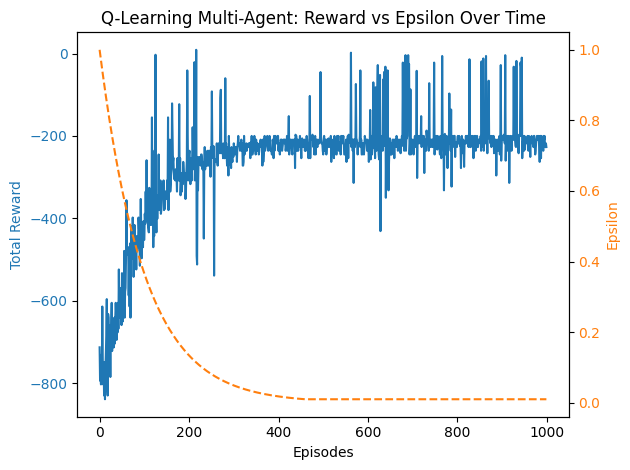

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

class QLearningAgent:
    def __init__(self, env, agent_id, learning_rate=0.5, discount_factor=0.95, epsilon=1.0,
                 epsilon_min=0.01, epsilon_decay=0.99):
        self.env = env
        self.agent_id = agent_id 
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
    
    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        else:
            return np.argmax(self.q_table[state, :])
    
    def update_q_table(self, state, action, reward, next_state):
        old_q_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state])
        new_q_value = old_q_value + self.learning_rate * (
            reward + self.discount_factor * next_max - old_q_value)
        self.q_table[state, action] = new_q_value
    
    def train(self, total_episodes=1000, max_steps=100):
        rewards = []
        epsilons = []
        success_rate = 0
        total_steps = 0

        for episode in range(total_episodes):
            state1, _ = self.env.reset()  
            state2, _ = self.env.reset() 
            done = False
            total_reward = 0
            episode_steps = 0

            while not done and episode_steps < max_steps:
                action1 = self.choose_action(state1)
                action2 = self.choose_action(state2)

                next_state1, reward1, terminated, truncated, _ = self.env.step(action1)
                next_state2, reward2, terminated, truncated, _ = self.env.step(action2)

                self.update_q_table(state1, action1, reward1, next_state1)
                self.update_q_table(state2, action2, reward2, next_state2)

                state1, state2 = next_state1, next_state2
                total_reward += reward1 + reward2  
                episode_steps += 1
                done = terminated or truncated

            rewards.append(total_reward)
            epsilons.append(self.epsilon)
            total_steps += episode_steps

            if self.epsilon > self.epsilon_min:
                self.epsilon *= self.epsilon_decay

            if total_reward >= 0:
                success_rate += 1

            if episode % 100 == 0:
                print(f"Episode {episode}/{total_episodes} - Total Reward: {total_reward} - Success Rate: {success_rate / (episode + 1):.2f}")
        
        print(f"\nTraining finished after {total_episodes} episodes")
        print(f"Average reward per episode: {np.mean(rewards):.2f}")
        print(f"Average steps per episode: {total_steps / total_episodes:.2f}")
        print(f"Success rate: {success_rate / total_episodes:.2f}")

        return rewards, epsilons

env = gym.make('Taxi-v3')
agent1 = QLearningAgent(env, agent_id=1)
agent2 = QLearningAgent(env, agent_id=2)
rewards, epsilons = agent1.train(total_episodes=1000)


fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Total Reward', color=color)
ax1.plot(rewards, color=color, label='Reward')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Epsilon', color=color)
ax2.plot(epsilons, color=color, linestyle='--', label='Epsilon')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Q-Learning Multi-Agent: Reward vs Epsilon Over Time')
fig.tight_layout()
plt.show()


Episode 0/1000 - Total Reward: -343 - Steps: 100 - Success Rate: 0.00
Episode 100/1000 - Total Reward: -253 - Steps: 100 - Success Rate: 0.03
Episode 200/1000 - Total Reward: -226 - Steps: 100 - Success Rate: 0.11
Episode 300/1000 - Total Reward: -121 - Steps: 79 - Success Rate: 0.29
Episode 400/1000 - Total Reward: -59 - Steps: 44 - Success Rate: 0.45
Episode 500/1000 - Total Reward: -4 - Steps: 16 - Success Rate: 0.55
Episode 600/1000 - Total Reward: -2 - Steps: 23 - Success Rate: 0.63
Episode 700/1000 - Total Reward: -8 - Steps: 20 - Success Rate: 0.68
Episode 800/1000 - Total Reward: 11 - Steps: 10 - Success Rate: 0.72
Episode 900/1000 - Total Reward: 13 - Steps: 8 - Success Rate: 0.75

Training finished after 1000 episodes
Average reward per episode: -69.25
Average steps per episode: 39.74
Success rate: 0.78


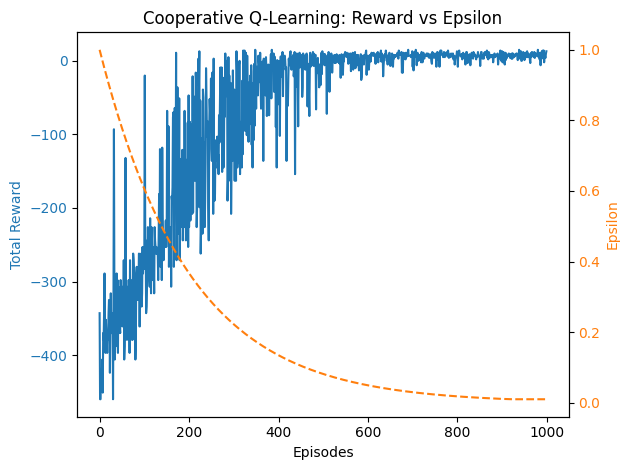

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

class CooperativeQLearningAgent:
    def __init__(self, env, learning_rate=0.5, discount_factor=0.95, epsilon=1.0,
                 epsilon_min=0.01, epsilon_decay=0.995):
        self.env = env
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        return np.argmax(self.q_table[state])

    def update_q_table(self, state, action, reward, next_state):
        old_value = self.q_table[state, action]
        next_max = np.max(self.q_table[next_state])
        new_value = old_value + self.learning_rate * (
            reward + self.discount_factor * next_max - old_value)
        self.q_table[state, action] = new_value

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

env = gym.make("Taxi-v3")
agent1 = CooperativeQLearningAgent(env)
agent2 = CooperativeQLearningAgent(env)

def cooperative_train(agent1, agent2, episodes=1000, max_steps=100):
    rewards = []
    epsilons = []
    steps_per_episode = []
    success_count = 0

    for ep in range(episodes):
        state, _ = env.reset()
        total_reward = 0
        steps = 0
        success = False

        for step in range(max_steps):
            action1 = agent1.choose_action(state)
            action2 = agent2.choose_action(state)
            action = np.random.choice([action1, action2])

            next_state, reward, terminated, truncated, _ = env.step(action)

            agent1.update_q_table(state, action, reward, next_state)
            agent2.update_q_table(state, action, reward, next_state)

            state = next_state
            total_reward += reward
            steps += 1

            if reward == 20: 
                success = True

            if terminated or truncated:
                break

        if success:
            success_count += 1

        rewards.append(total_reward)
        steps_per_episode.append(steps)
        epsilons.append(agent1.epsilon)
        agent1.decay_epsilon()
        agent2.decay_epsilon()

        if ep % 100 == 0:
            print(f"Episode {ep}/{episodes} - Total Reward: {total_reward} - Steps: {steps} - Success Rate: {success_count / (ep + 1):.2f}")

    print("\nTraining finished after {} episodes".format(episodes))
    print("Average reward per episode: {:.2f}".format(np.mean(rewards)))
    print("Average steps per episode: {:.2f}".format(np.mean(steps_per_episode)))
    print("Success rate: {:.2f}".format(success_count / episodes))

    return rewards, epsilons, steps_per_episode

rewards, epsilons, steps_per_episode = cooperative_train(agent1, agent2, episodes=1000)

fig, ax1 = plt.subplots()
ax1.set_xlabel("Episodes")
ax1.set_ylabel("Total Reward", color="tab:blue")
ax1.plot(rewards, color="tab:blue", label="Reward")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.set_ylabel("Epsilon", color="tab:orange")
ax2.plot(epsilons, color="tab:orange", linestyle="--", label="Epsilon")
ax2.tick_params(axis="y", labelcolor="tab:orange")

plt.title("Cooperative Q-Learning: Reward vs Epsilon")
fig.tight_layout()
plt.show()


# Q-Learning Exploration


In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:
def moving_average(data, window_size=50):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


In [3]:
class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.99, epsilon=1.0,
                 epsilon_min=0.1, epsilon_decay=0.995, strategy='epsilon_greedy', temperature=1.0):
        self.env = env
        self.lr = learning_rate
        self.df = discount_factor
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.strategy = strategy
        self.temperature = temperature
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))

    def choose_action(self, state):
        if self.strategy == 'epsilon_greedy':
            if np.random.rand() < self.epsilon:
                return self.env.action_space.sample()
            return np.argmax(self.q_table[state])
        elif self.strategy == 'boltzmann':
            q_values = self.q_table[state]
            exp_q = np.exp(q_values / self.temperature)
            probs = exp_q / np.sum(exp_q)
            return np.random.choice(len(q_values), p=probs)

    def update_q(self, state, action, reward, next_state):
        best_next = np.max(self.q_table[next_state])
        self.q_table[state, action] += self.lr * (reward + self.df * best_next - self.q_table[state, action])

    def decay(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def train(self, episodes=1000, max_steps=100, step_penalty=0, hole_penalty=0):
        rewards, steps = [], []
        for ep in range(episodes):
            state, _ = self.env.reset()
            total_reward, step = 0, 0
            for _ in range(max_steps):
                action = self.choose_action(state)
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                reward += step_penalty
                if reward == -10:
                    reward += hole_penalty
                self.update_q(state, action, reward, next_state)
                state = next_state
                total_reward += reward
                step += 1
                if terminated or truncated:
                    break
            self.decay()
            rewards.append(total_reward)
            steps.append(step)
        return rewards, steps


In [4]:
configs = [
    {"learning_rate": 0.1, "discount_factor": 0.95, "strategy": "epsilon_greedy"},
    {"learning_rate": 0.5, "discount_factor": 0.99, "strategy": "boltzmann", "temperature": 1.0},
    {"learning_rate": 0.01, "discount_factor": 0.9, "strategy": "epsilon_greedy"},
]

env = gym.make("Taxi-v3")
all_rewards = []

for cfg in configs:
    agent = QLearningAgent(env, **cfg)
    rewards, _ = agent.train(episodes=500)
    all_rewards.append((cfg, moving_average(rewards)))


c:\Users\denic\miniconda3\envs\SEM1-CB\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


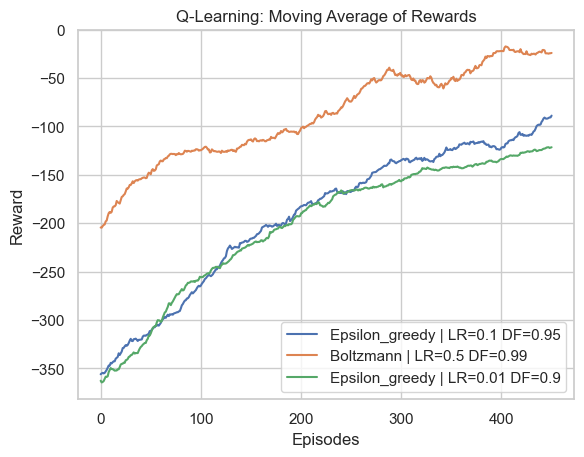

In [ ]:
for (cfg, rewards) in all_rewards:
    label = f"{cfg['strategy'].capitalize()} | LR={cfg['learning_rate']} DF={cfg['discount_factor']}"
    plt.plot(rewards, label=label)

plt.title("Q-Learning: Moving Average of Rewards")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.legend()
plt.show()


## Reward Shaping

c:\Users\denic\miniconda3\envs\SEM1-CB\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


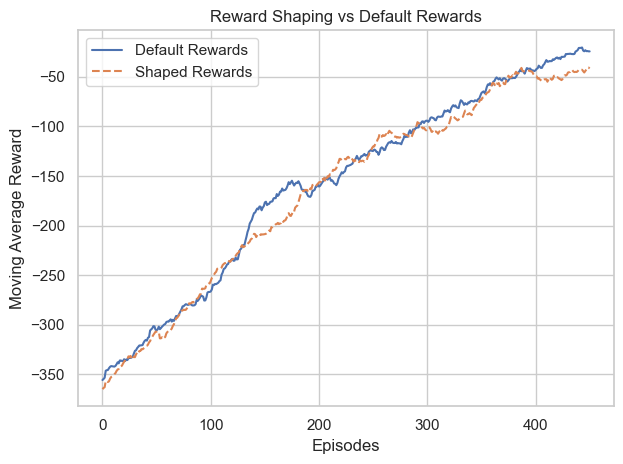

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt
def moving_average(data, window_size=50):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

class QLearningAgent:
    def __init__(self, env, learning_rate=0.3, discount_factor=0.95, epsilon=1.0,
                 epsilon_min=0.1, epsilon_decay=0.995, strategy='epsilon_greedy', temperature=1.0):
        self.env = env
        self.lr = learning_rate
        self.df = discount_factor
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.strategy = strategy
        self.temperature = temperature
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))

    def choose_action(self, state):
        if self.strategy == 'epsilon_greedy':
            if np.random.rand() < self.epsilon:
                return self.env.action_space.sample()
            return np.argmax(self.q_table[state])
        elif self.strategy == 'boltzmann':
            q_values = self.q_table[state]
            exp_q = np.exp(q_values / self.temperature)
            probs = exp_q / np.sum(exp_q)
            return np.random.choice(len(q_values), p=probs)

    def update_q(self, state, action, reward, next_state):
        best_next = np.max(self.q_table[next_state])
        self.q_table[state, action] += self.lr * (reward + self.df * best_next - self.q_table[state, action])

    def decay(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def train(self, episodes=500, max_steps=100, step_penalty=0, hole_penalty=0,success_bonus=0):
        rewards, steps = [], []
        for ep in range(episodes):
            state, _ = self.env.reset()
            total_reward, step = 0, 0
            for _ in range(max_steps):
                action = self.choose_action(state)
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                reward += step_penalty
                if reward == -10:
                    reward += hole_penalty
                elif reward == 20:
                    reward += success_bonus
                self.update_q(state, action, reward, next_state)
                state = next_state
                total_reward += reward
                step += 1
                if terminated or truncated:
                    break
            self.decay()
            rewards.append(total_reward)
            steps.append(step)
        return rewards, steps

env = gym.make("Taxi-v3")

default_agent = QLearningAgent(env, learning_rate=0.3, discount_factor=0.95)
default_rewards, _ = default_agent.train(episodes=500)
shaped_agent = QLearningAgent(env, learning_rate=0.3, discount_factor=0.95)
shaped_rewards, _ = shaped_agent.train(episodes=500, step_penalty=-0.01, hole_penalty=-0.5,success_bonus=10)
plt.plot(moving_average(default_rewards), label="Default Rewards")
plt.plot(moving_average(shaped_rewards), label="Shaped Rewards", linestyle='--')
plt.title("Reward Shaping vs Default Rewards")
plt.xlabel("Episodes")
plt.ylabel("Moving Average Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Max Q-value comparison

c:\Users\denic\miniconda3\envs\SEM1-CB\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


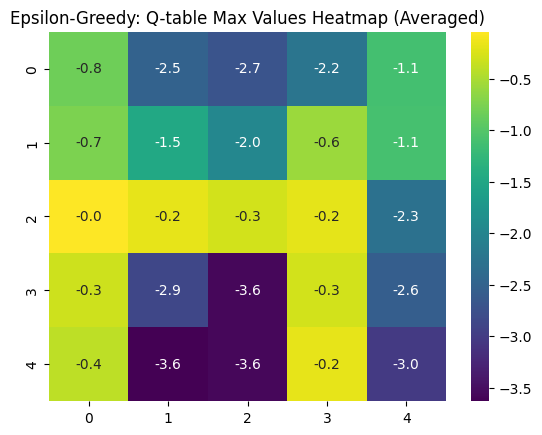

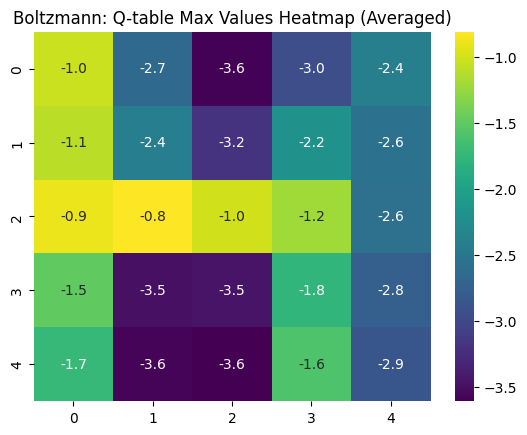

In [5]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import seaborn as sns

def moving_average(data, window_size=50):
    return np.convolve(data, np.ones(window_size) / window_size, mode='valid')

class QLearningAgent:
    def __init__(self, env, learning_rate=0.3, discount_factor=0.95, epsilon=1.0,
                 epsilon_min=0.1, epsilon_decay=0.995, strategy='epsilon_greedy', temperature=1.0):
        self.env = env
        self.lr = learning_rate
        self.df = discount_factor
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.strategy = strategy
        self.temperature = temperature
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))

    def choose_action(self, state):
        if self.strategy == 'epsilon_greedy':
            if np.random.rand() < self.epsilon:
                return self.env.action_space.sample()
            return np.argmax(self.q_table[state])
        elif self.strategy == 'boltzmann':
            q_values = self.q_table[state]
            exp_q = np.exp(q_values / self.temperature)
            probs = exp_q / np.sum(exp_q)
            return np.random.choice(len(q_values), p=probs)

    def update_q(self, state, action, reward, next_state):
        best_next = np.max(self.q_table[next_state])
        self.q_table[state, action] += self.lr * (reward + self.df * best_next - self.q_table[state, action])

    def decay(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def train(self, episodes=500, max_steps=100):
        for ep in range(episodes):
            state, _ = self.env.reset()
            for _ in range(max_steps):
                action = self.choose_action(state)
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                self.update_q(state, action, reward, next_state)
                state = next_state
                if terminated or truncated:
                    break
            self.decay()
        return self.q_table

def plot_heatmap(q_table, title):
    state_vals = np.max(q_table, axis=1).reshape(5, 5, 5, 4)
    state_vals_2d = state_vals.mean(axis=2).mean(axis=2)

    sns.heatmap(state_vals_2d, annot=True, fmt=".1f", cmap="viridis")
    plt.title(title)
    plt.show()

env = gym.make("Taxi-v3")

agent_eps = QLearningAgent(env, strategy='epsilon_greedy')
q_eps = agent_eps.train()
agent_boltz = QLearningAgent(env, strategy='boltzmann', temperature=1.0)
q_boltz = agent_boltz.train()
plot_heatmap(q_eps, "Epsilon-Greedy: Q-table Max Values Heatmap (Averaged)")
plot_heatmap(q_boltz, "Boltzmann: Q-table Max Values Heatmap (Averaged)")


## Introspection analysis

In [2]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def softmax(q_values, temperature=1.0):
    exp_q = np.exp(q_values / temperature)
    return exp_q / np.sum(exp_q)

def entropy(probs):
    return -np.sum(probs * np.log(probs + 1e-10))  # to prevent log(0)

def introspect_q_table(q_table, env, num_samples=10):
    np.random.seed(42)
    state_space_size = env.observation_space.n
    sampled_states = np.random.choice(state_space_size, size=num_samples, replace=False)

    action_names = ["South", "North", "East", "West", "Pickup", "Drop"]
    data = []

    print("🔍 Agent Introspection on Random States\n")
    for state in sampled_states:
        q_values = q_table[state]
        probs = softmax(q_values)
        ent = entropy(probs)

        best_action = np.argmax(q_values)
        second_best_action = np.argsort(q_values)[-2]
        confidence = q_values[best_action] - q_values[second_best_action]

        taxi_row, taxi_col, passenger_loc, destination = env.decode(state)
        state_desc = f"Taxi=({taxi_row},{taxi_col}) P={passenger_loc} D={destination}"

        print(f"\n State {state} | {state_desc}")
        print(f"Q-values: {np.round(q_values, 2)}")
        print(f"Best Action: {action_names[best_action]} ({q_values[best_action]:.2f})")
        print(f"Second Best: {action_names[second_best_action]} ({q_values[second_best_action]:.2f})")
        print(f"Confidence (ΔQ): {confidence:.2f}")
        print(f"Entropy of softmax(Q): {ent:.2f}")

        data.append({
            "State": state,
            "Best Action": action_names[best_action],
            "Confidence": confidence,
            "Entropy": ent
        })

    df = pd.DataFrame(data)
    most_confident = df.sort_values(by="Confidence", ascending=False).head(5)
    most_uncertain = df.sort_values(by="Entropy", ascending=False).head(5)

    print("\n Top 5 Most Confident States:")
    print(most_confident)

    print("\n Top 5 Most Uncertain States:")
    print(most_uncertain)

    return df, most_confident, most_uncertain


In [6]:
env = gym.make("Taxi-v3")
agent = QLearningAgent(env)
agent.train()

introspect_q_table(agent.q_table, env)


c:\Users\denic\miniconda3\envs\SEM1-CB\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


🔍 Agent Introspection on Random States


 State 361 | Taxi=(3,3) P=0 D=1
Q-values: [ -5.92  -5.78  -5.98  -5.81  -5.96 -12.18]
Best Action: North (-5.78)
Second Best: West (-5.81)
Confidence (ΔQ): 0.03
Entropy of softmax(Q): 1.61

 State 73 | Taxi=(0,3) P=3 D=1
Q-values: [-5.12 -5.22 -5.02 -5.09 -9.81 -8.39]
Best Action: East (-5.02)
Second Best: West (-5.09)
Confidence (ΔQ): 0.07
Entropy of softmax(Q): 1.44

 State 374 | Taxi=(3,3) P=3 D=2
Q-values: [  0.23  -4.71  -4.59  -4.09 -12.34 -10.34]
Best Action: South (0.23)
Second Best: West (-4.09)
Confidence (ΔQ): 4.33
Entropy of softmax(Q): 0.16

 State 155 | Taxi=(1,2) P=3 D=3
Q-values: [0. 0. 0. 0. 0. 0.]
Best Action: South (0.00)
Second Best: Pickup (0.00)
Confidence (ΔQ): 0.00
Entropy of softmax(Q): 1.79

 State 104 | Taxi=(1,0) P=1 D=0
Q-values: [ -6.36  -6.27  -6.36  -6.29 -12.45 -12.7 ]
Best Action: North (-6.27)
Second Best: West (-6.29)
Confidence (ΔQ): 0.02
Entropy of softmax(Q): 1.39

 State 394 | Taxi=(3,4) P=3 D=2
Q-values: 

(   State Best Action  Confidence   Entropy
 0    361       North    0.033381  1.608873
 1     73        East    0.069859  1.436183
 2    374       South    4.325002  0.155906
 3    155       South    0.000000  1.791759
 4    104       North    0.018336  1.392306
 5    394        West    0.988709  1.303203
 6    377       North    8.350124  0.002233
 7    124        West    0.046462  1.406886
 8     68       North    0.123606  1.389834
 9    450       South    0.000000  1.791759,
    State Best Action  Confidence   Entropy
 6    377       North    8.350124  0.002233
 2    374       South    4.325002  0.155906
 5    394        West    0.988709  1.303203
 8     68       North    0.123606  1.389834
 1     73        East    0.069859  1.436183,
    State Best Action  Confidence   Entropy
 3    155       South    0.000000  1.791759
 9    450       South    0.000000  1.791759
 0    361       North    0.033381  1.608873
 1     73        East    0.069859  1.436183
 7    124        West    0.046

## Q-values over time

In [58]:
class QLearningAgent:
    def __init__(self, env, learning_rate=0.3, discount_factor=0.95, epsilon=1.0,
                 epsilon_min=0.1, epsilon_decay=0.995, strategy='epsilon_greedy', temperature=1.0):
        self.env = env
        self.lr = learning_rate
        self.df = discount_factor
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.strategy = strategy
        self.temperature = temperature
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))

    def choose_action(self, state):
        if self.strategy == 'epsilon_greedy':
            if np.random.rand() < self.epsilon:
                return self.env.action_space.sample()
            return np.argmax(self.q_table[state])
        elif self.strategy == 'boltzmann':
            q_values = self.q_table[state]
            exp_q = np.exp(q_values / self.temperature)
            probs = exp_q / np.sum(exp_q)
            return np.random.choice(len(q_values), p=probs)

    def update_q(self, state, action, reward, next_state):
        best_next = np.max(self.q_table[next_state])
        self.q_table[state, action] += self.lr * (reward + self.df * best_next - self.q_table[state, action])

    def decay(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def train_with_tracking(self, episodes=1000, max_steps=100, track_state=None, log_interval=100):
        tracked_q_values = []

        for ep in range(episodes):
            state, _ = self.env.reset()
            for _ in range(max_steps):
                action = self.choose_action(state)
                next_state, reward, terminated, truncated, _ = self.env.step(action)
                self.update_q(state, action, reward, next_state)
                state = next_state
                if terminated or truncated:
                    break
            self.decay()

            if track_state is not None and ep % log_interval == 0:
                tracked_q_values.append(self.q_table[track_state].copy())

        return tracked_q_values


In [ ]:
env = gym.make("Taxi-v3")
tracked_state = env.encode(0, 0, 1, 2)

agent = QLearningAgent(env)
q_progress = agent.train_with_tracking(episodes=1000, track_state=tracked_state)


c:\Users\denic\miniconda3\envs\SEM1-CB\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

action_labels = ["South", "North", "East", "West", "Pickup", "Drop"]
q_progress = np.array(q_progress)

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(action_labels, q_progress[0])
ax.set_ylim(np.min(q_progress) - 1, np.max(q_progress) + 1)
title = ax.set_title("Q-values at Episode 0")

def update(frame):
    for bar, height in zip(bars, q_progress[frame]):
        bar.set_height(height)
    title.set_text(f"Q-values at Episode {frame * 100}")

anim = FuncAnimation(fig, update, frames=len(q_progress), interval=500)
plt.close()
HTML(anim.to_jshtml())  


## Agent comparison

In [ ]:
def run_random_agent(env, episodes=1000, max_steps=100):
    rewards = []
    success = 0

    for _ in range(episodes):
        state, _ = env.reset()
        total_reward = 0
        for _ in range(max_steps):
            action = env.action_space.sample()
            state, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward
            if reward == 20:  
                success += 1
            if terminated or truncated:
                break
        rewards.append(total_reward)

    return rewards, success / episodes


In [ ]:
def decode(state, env):
    return env.unwrapped.decode(state)

def run_rule_based_agent(env, episodes=1000, max_steps=100):
    rewards = []
    success = 0

    for _ in range(episodes):
        state, _ = env.reset()
        total_reward = 0
        for _ in range(max_steps):
            taxi_row, taxi_col, passenger_loc, destination = decode(state, env)

            if passenger_loc < 4:  
                goal_row, goal_col = env.unwrapped.locs[passenger_loc]
            else:  
                goal_row, goal_col = env.unwrapped.locs[destination]

            if taxi_row < goal_row:
                action = 0  # South
            elif taxi_row > goal_row:
                action = 1  # North
            elif taxi_col < goal_col:
                action = 2  # East
            elif taxi_col > goal_col:
                action = 3  # West
            elif passenger_loc < 4:
                action = 4  # Pickup
            else:
                action = 5  # Drop-off

            state, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward
            if reward == 20:
                success += 1
            if terminated or truncated:
                break
        rewards.append(total_reward)

    return rewards, success / episodes


In [ ]:
def run_q_agent(agent, env, episodes=1000, max_steps=100):
    rewards = []
    success = 0
    for _ in range(episodes):
        state, _ = env.reset()
        total_reward = 0
        for _ in range(max_steps):
            action = np.argmax(agent.q_table[state])
            state, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward
            if reward == 20:
                success += 1
            if terminated or truncated:
                break
        rewards.append(total_reward)
    return rewards, success / episodes


c:\Users\denic\miniconda3\envs\SEM1-CB\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


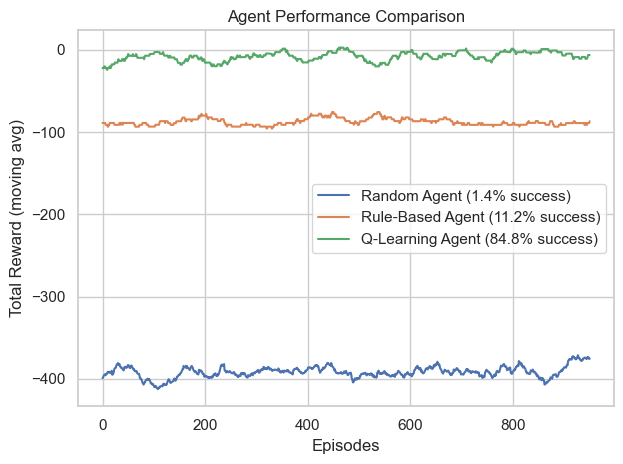

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

env = gym.make("Taxi-v3")

rand_rewards, rand_success = run_random_agent(env)
rule_rewards, rule_success = run_rule_based_agent(env)
q_rewards, q_success = run_q_agent(agent, env)

def moving_average(data, window=50):
    return np.convolve(data, np.ones(window)/window, mode='valid')

plt.plot(moving_average(rand_rewards), label=f"Random Agent ({rand_success*100:.1f}% success)")
plt.plot(moving_average(rule_rewards), label=f"Rule-Based Agent ({rule_success*100:.1f}% success)")
plt.plot(moving_average(q_rewards), label=f"Q-Learning Agent ({q_success*100:.1f}% success)")

plt.xlabel("Episodes")
plt.ylabel("Total Reward (moving avg)")
plt.title("Agent Performance Comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Custom grid sizes

In [ ]:
import gym
from gym import spaces
import numpy as np
import random

class CustomTaxiEnv(gym.Env):
    def __init__(self, grid_size=(8, 8), num_locs=4):
        super(CustomTaxiEnv, self).__init__()
        self.grid_rows, self.grid_cols = grid_size
        self.num_locs = num_locs

        self.action_space = spaces.Discrete(6)

        self.locs = [
            (random.randint(0, self.grid_rows - 1), random.randint(0, self.grid_cols - 1))
            for _ in range(self.num_locs)
        ]

        self.observation_space = spaces.Discrete(
            self.grid_rows * self.grid_cols * (self.num_locs + 1) * self.num_locs
        )

        self.reset()

    def encode(self, taxi_row, taxi_col, pass_loc, dest_idx):
        i = taxi_row
        i *= self.grid_cols
        i += taxi_col
        i *= (self.num_locs + 1)
        i += pass_loc
        i *= self.num_locs
        i += dest_idx
        return i

    def decode(self, i):
        out = []
        out.append(i % self.num_locs)
        i //= self.num_locs
        out.append(i % (self.num_locs + 1))
        i //= (self.num_locs + 1)
        out.append(i % self.grid_cols)
        i //= self.grid_cols
        out.append(i)
        return list(reversed(out))

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.taxi_row = random.randint(0, self.grid_rows - 1)
        self.taxi_col = random.randint(0, self.grid_cols - 1)
        self.pass_loc = random.randint(0, self.num_locs - 1)
        self.dest_idx = random.randint(0, self.num_locs - 1)
        self.passenger_in_taxi = False
        self.steps = 0
        return self._get_obs(), {}

    def _get_obs(self):
        pass_loc = self.num_locs if self.passenger_in_taxi else self.pass_loc
        return self.encode(self.taxi_row, self.taxi_col, pass_loc, self.dest_idx)

    def step(self, action):
        self.steps += 1
        reward = -1 
        done = False

        if action == 0 and self.taxi_row < self.grid_rows - 1:
            self.taxi_row += 1
        elif action == 1 and self.taxi_row > 0:
            self.taxi_row -= 1
        elif action == 2 and self.taxi_col < self.grid_cols - 1:
            self.taxi_col += 1
        elif action == 3 and self.taxi_col > 0:
            self.taxi_col -= 1
        elif action == 4: 
            if not self.passenger_in_taxi and (self.taxi_row, self.taxi_col) == self.locs[self.pass_loc]:
                self.passenger_in_taxi = True
            else:
                reward = -10
        elif action == 5: 
            if self.passenger_in_taxi and (self.taxi_row, self.taxi_col) == self.locs[self.dest_idx]:
                reward = 20
                done = True
            else:
                reward = -10

        obs = self._get_obs()
        return obs, reward, done, False, {}

    def render(self):
        grid = [['.' for _ in range(self.grid_cols)] for _ in range(self.grid_rows)]
        grid[self.taxi_row][self.taxi_col] = 'T'
        for i, (r, c) in enumerate(self.locs):
            symbol = chr(ord('A') + i)
            grid[r][c] = symbol
        print("\n".join([" ".join(row) for row in grid]))
        print(f"Passenger: {'in taxi' if self.passenger_in_taxi else self.pass_loc}, Destination: {self.dest_idx}")


In [67]:
env_8x8 = CustomTaxiEnv(grid_size=(8, 8), num_locs=4)
env_10x10 = CustomTaxiEnv(grid_size=(10, 10), num_locs=8)


In [68]:
obs, _ = env_8x8.reset()
env_8x8.render()


. . . . . . . .
. . . . . B . .
. . . . . . . C
. . . . . . . .
. . . . . . . .
. . . . . A . T
. . . D . . . .
. . . . . . . .
Passenger: 3, Destination: 1


c:\Users\denic\miniconda3\envs\SEM1-CB\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


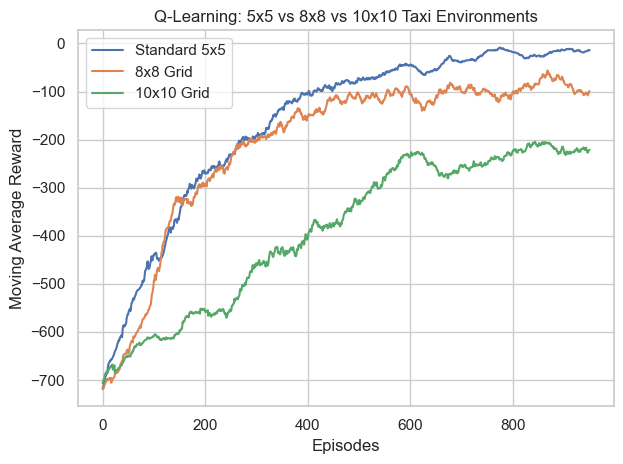

In [ ]:
from gym import spaces
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

class CustomTaxiEnv(gym.Env):
    def __init__(self, grid_size=(8, 8), num_locs=4):
        super(CustomTaxiEnv, self).__init__()
        self.grid_rows, self.grid_cols = grid_size
        self.num_locs = num_locs
        self.action_space = spaces.Discrete(6)
        self.locs = [
            (random.randint(0, self.grid_rows - 1), random.randint(0, self.grid_cols - 1))
            for _ in range(self.num_locs)
        ]
        self.observation_space = spaces.Discrete(
            self.grid_rows * self.grid_cols * (self.num_locs + 1) * self.num_locs
        )
        self.reset()

    def encode(self, taxi_row, taxi_col, pass_loc, dest_idx):
        i = taxi_row
        i *= self.grid_cols
        i += taxi_col
        i *= (self.num_locs + 1)
        i += pass_loc
        i *= self.num_locs
        i += dest_idx
        return i

    def decode(self, i):
        out = []
        out.append(i % self.num_locs)
        i //= self.num_locs
        out.append(i % (self.num_locs + 1))
        i //= (self.num_locs + 1)
        out.append(i % self.grid_cols)
        i //= self.grid_cols
        out.append(i)
        return list(reversed(out))

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.taxi_row = random.randint(0, self.grid_rows - 1)
        self.taxi_col = random.randint(0, self.grid_cols - 1)
        self.pass_loc = random.randint(0, self.num_locs - 1)
        self.dest_idx = random.randint(0, self.num_locs - 1)
        self.passenger_in_taxi = False
        return self._get_obs(), {}

    def _get_obs(self):
        pass_loc = self.num_locs if self.passenger_in_taxi else self.pass_loc
        return self.encode(self.taxi_row, self.taxi_col, pass_loc, self.dest_idx)

    def step(self, action):
        reward = -1
        done = False

        if action == 0 and self.taxi_row < self.grid_rows - 1:
            self.taxi_row += 1
        elif action == 1 and self.taxi_row > 0:
            self.taxi_row -= 1
        elif action == 2 and self.taxi_col < self.grid_cols - 1:
            self.taxi_col += 1
        elif action == 3 and self.taxi_col > 0:
            self.taxi_col -= 1
        elif action == 4:
            if not self.passenger_in_taxi and (self.taxi_row, self.taxi_col) == self.locs[self.pass_loc]:
                self.passenger_in_taxi = True
            else:
                reward = -10
        elif action == 5:
            if self.passenger_in_taxi and (self.taxi_row, self.taxi_col) == self.locs[self.dest_idx]:
                reward = 20
                done = True
            else:
                reward = -10

        obs = self._get_obs()
        return obs, reward, done, False, {}

    def render(self):
        grid = [['.' for _ in range(self.grid_cols)] for _ in range(self.grid_rows)]
        grid[self.taxi_row][self.taxi_col] = 'T'
        for i, (r, c) in enumerate(self.locs):
            symbol = chr(ord('A') + i)
            grid[r][c] = symbol
        print("\n".join([" ".join(row) for row in grid]))
        print(f"Passenger: {'in taxi' if self.passenger_in_taxi else self.pass_loc}, Destination: {self.dest_idx}")

class QLearningAgent:
    def __init__(self, env, learning_rate=0.1, discount_factor=0.95,
                 epsilon=1.0, epsilon_min=0.1, epsilon_decay=0.995):
        self.env = env
        self.lr = learning_rate
        self.df = discount_factor
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay
        self.q_table = defaultdict(lambda: np.zeros(env.action_space.n))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return self.env.action_space.sample()
        return np.argmax(self.q_table[state])

    def train(self, episodes=1000, max_steps=200):
        rewards = []
        for ep in range(episodes):
            state, _ = self.env.reset()
            total_reward = 0
            for _ in range(max_steps):
                action = self.choose_action(state)
                next_state, reward, done, _, _ = self.env.step(action)
                best_next = np.max(self.q_table[next_state])
                self.q_table[state][action] += self.lr * (reward + self.df * best_next - self.q_table[state][action])
                state = next_state
                total_reward += reward
                if done:
                    break
            self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
            rewards.append(total_reward)
        return rewards

def moving_average(data, window=50):
    return np.convolve(data, np.ones(window)/window, mode='valid')

env_8x8 = CustomTaxiEnv(grid_size=(8, 8), num_locs=4)
env_10x10 = CustomTaxiEnv(grid_size=(10, 10), num_locs=8)
env_standard = gym.make("Taxi-v3")

agent_8x8 = QLearningAgent(env_8x8)
rewards_8x8 = agent_8x8.train()

agent_10x10 = QLearningAgent(env_10x10)
rewards_10x10 = agent_10x10.train()

agent_std = QLearningAgent(env_standard)
rewards_std = agent_std.train()

plt.plot(moving_average(rewards_std), label="Standard 5x5")
plt.plot(moving_average(rewards_8x8), label="8x8 Grid")
plt.plot(moving_average(rewards_10x10), label="10x10 Grid")
plt.title("Q-Learning: 5x5 vs 8x8 vs 10x10 Taxi Environments")
plt.xlabel("Episodes")
plt.ylabel("Moving Average Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Deep Reinforcement Learning for CartPole

In this notebook, we build upon the fundamentals established in our Taxi RL notebook and apply deep reinforcement learning (RL) techniques to a more challenging environment: CartPole.  
 
**Objectives:**
- Use a Deep Q-Network (DQN) to learn a policy for balancing the pole.
- Incorporate techniques such as experience replay to stabilize training.
- Experiment with hyperparameters such as the discount factor (γ), exploration strategies (epsilon-greedy), and learning rate.
- Visualize performance through reward curves and loss plots.

This work reflects both the theoretical background from our RL presentation (covering Q-learning, action-value estimation, experience replay, and the explore-exploit trade-off) and the practical implementation in a deep learning framework.


In [ ]:
import gym
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)
env = gym.make("CartPole-v1")

reset_result = env.reset()
if isinstance(reset_result, tuple):
    state, _ = reset_result 
else:
    state = reset_result

state = np.array(state)
state_size = state.shape[0]
action_size = env.action_space.n

print("State size:", state_size)
print("Action size:", action_size)


State size: 4
Action size: 2


In [14]:
def build_dqn_model(state_size, action_size):
    model = models.Sequential()
    model.add(layers.Dense(24, input_dim=state_size, activation='relu'))
    model.add(layers.Dense(24, activation='relu'))
    model.add(layers.Dense(action_size, activation='linear'))
    model.compile(loss='mse', optimizer=optimizers.Adam(learning_rate=0.001))
    return model

model = build_dqn_model(state_size, action_size)
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24)                120       
                                                                 
 dense_13 (Dense)            (None, 24)                600       
                                                                 
 dense_14 (Dense)            (None, 2)                 50        
                                                                 
Total params: 770 (3.01 KB)
Trainable params: 770 (3.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    
    def add(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))
    
    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)
    
    def __len__(self):
        return len(self.buffer)

buffer_capacity = 2000
replay_buffer = ReplayBuffer(buffer_capacity)


In [ ]:
gamma = 0.95           
epsilon = 1.0        
epsilon_min = 0.01   
epsilon_decay = 0.995  
batch_size = 32        
episodes = 500         
target_update_freq = 10  

target_model = build_dqn_model(state_size, action_size)
target_model.set_weights(model.get_weights())

rewards_list = []
loss_history = []


In [ ]:
for episode in range(1, episodes + 1):
    reset_result = env.reset()
    if isinstance(reset_result, tuple):
        state, _ = reset_result
    else:
        state = reset_result
    state = np.array(state)
    state = np.reshape(state, [1, state_size])
    
    total_reward = 0
    done = False
    while not done:
        if np.random.rand() <= epsilon:
            action = random.randrange(action_size)
        else:
            q_values = model.predict(state, verbose=0)
            action = np.argmax(q_values[0])
        
        step_result = env.step(action)
        if len(step_result) == 5:
            next_state, reward, done, truncated, info = step_result
            done = done or truncated
        else:
            next_state, reward, done, info = step_result
        
        next_state = np.array(next_state)
        next_state = np.reshape(next_state, [1, state_size])
        
        replay_buffer.add(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward
        
        if len(replay_buffer) >= batch_size:
            minibatch = replay_buffer.sample(batch_size)
            states = np.vstack([np.array(exp[0]).reshape(1, -1) for exp in minibatch])
            actions = np.array([exp[1] for exp in minibatch])
            rewards = np.array([exp[2] for exp in minibatch])
            next_states = np.vstack([np.array(exp[3]).reshape(1, -1) for exp in minibatch])
            dones = np.array([exp[4] for exp in minibatch]).astype(float)
            
            target_q = target_model.predict(next_states, verbose=0)
            target = rewards + (1 - dones) * gamma * np.amax(target_q, axis=1)
            
            q_values = model.predict(states, verbose=0)
            for i, action in enumerate(actions):
                q_values[i][action] = target[i]
            
            history = model.fit(states, q_values, epochs=1, verbose=0)
            loss_history.append(history.history['loss'][0])
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay
    
    if episode % target_update_freq == 0:
        target_model.set_weights(model.get_weights())
    
    rewards_list.append(total_reward)
    
    if episode % 10 == 0:
        avg_reward = np.mean(rewards_list[-10:])
        print(f"Episode {episode}/{episodes}, Average Reward (last 10 episodes): {avg_reward:.2f}, Epsilon: {epsilon:.2f}")

print("Training complete!")


c:\Users\denic\miniconda3\envs\SEM1-CB\lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):



Episode 10/500, Average Reward (last 10 episodes): 18.50, Epsilon: 0.95
Episode 20/500, Average Reward (last 10 episodes): 17.90, Epsilon: 0.90
Episode 30/500, Average Reward (last 10 episodes): 13.50, Epsilon: 0.86
Episode 40/500, Average Reward (last 10 episodes): 19.30, Epsilon: 0.82
Episode 50/500, Average Reward (last 10 episodes): 30.10, Epsilon: 0.78
Episode 60/500, Average Reward (last 10 episodes): 28.00, Epsilon: 0.74
Episode 70/500, Average Reward (last 10 episodes): 35.50, Epsilon: 0.70
Episode 80/500, Average Reward (last 10 episodes): 40.90, Epsilon: 0.67
Episode 90/500, Average Reward (last 10 episodes): 58.20, Epsilon: 0.64
Episode 100/500, Average Reward (last 10 episodes): 72.90, Epsilon: 0.61
Episode 110/500, Average Reward (last 10 episodes): 59.70, Epsilon: 0.58
Episode 120/500, Average Reward (last 10 episodes): 96.60, Epsilon: 0.55
Episode 130/500, Average Reward (last 10 episodes): 79.50, Epsilon: 0.52
Episode 140/500, Average Reward (last 10 episodes): 121.50,

In [ ]:
model.save('trained_model.h5')
model.save_weights('model_weights.h5')


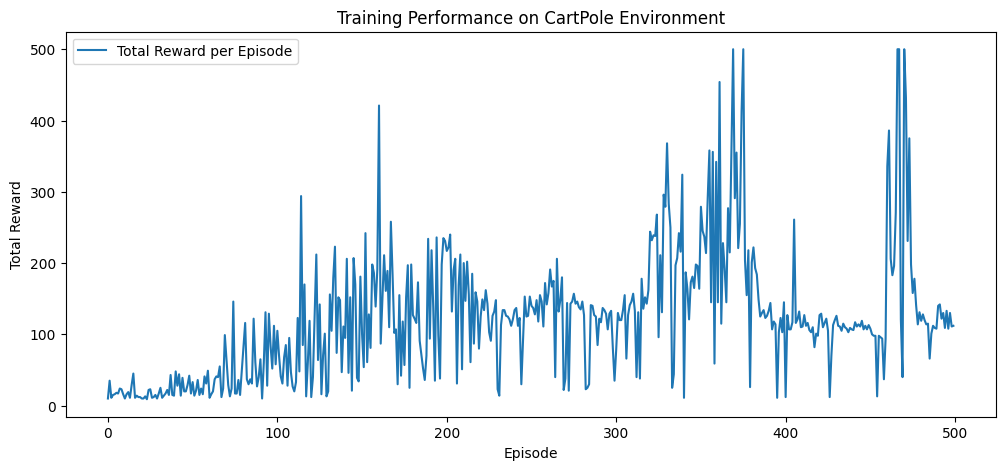

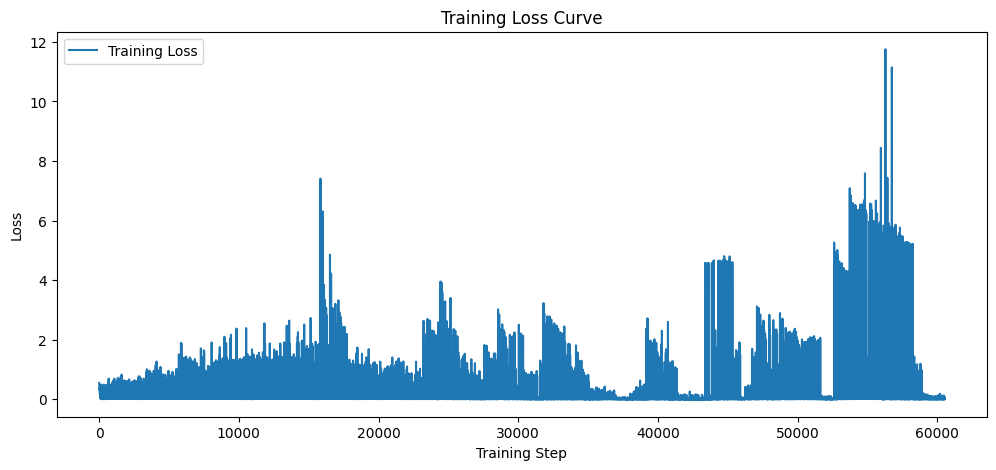

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(rewards_list, label='Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Training Performance on CartPole Environment')
plt.legend()
plt.show()

# Plotting loss history
plt.figure(figsize=(12, 5))
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()


In [ ]:
from gym.wrappers import RecordVideo
import os
import numpy as np

if not hasattr(np, 'bool'):
    np.bool = np.bool_

import gym
from tensorflow.keras.models import load_model

video_folder = "./cartpole_videos"
env = gym.make("CartPole-v1", render_mode="rgb_array")
env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda e: True)
model.load_weights("model_weights.h5")

state = env.reset()[0]  
state = np.reshape(state, [1, state_size])
done = False

while not done:
    q_values = model.predict(state, verbose=0)
    action = np.argmax(q_values[0])
    next_state, reward, done, _, _ = env.step(action)
    next_state = np.reshape(next_state, [1, state_size])
    state = next_state

env.close()
print(f"Video saved to {video_folder}")


C:\Users\denic\AppData\Local\Temp\ipykernel_2324\1787999254.py:6: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.  (This may have returned Python scalars in past versions.
  if not hasattr(np, 'bool'):


MoviePy - Building video c:\Users\denic\OneDrive\Desktop\sem7\cartpole_videos\rl-video-episode-0.mp4.
MoviePy - Writing video c:\Users\denic\OneDrive\Desktop\sem7\cartpole_videos\rl-video-episode-0.mp4



MoviePy - Done !
MoviePy - video ready c:\Users\denic\OneDrive\Desktop\sem7\cartpole_videos\rl-video-episode-0.mp4
🎥 Video saved to ./cartpole_videos


Exception ignored in: <function VideoRecorder.__del__ at 0x000001A8F09E3010>
Traceback (most recent call last):
  File "c:\Users\denic\miniconda3\envs\SEM1-CB\lib\site-packages\gym\wrappers\monitoring\video_recorder.py", line 178, in __del__
    self.close()
  File "c:\Users\denic\miniconda3\envs\SEM1-CB\lib\site-packages\gym\wrappers\monitoring\video_recorder.py", line 141, in close
    if not self.enabled or self._closed:
AttributeError: 'VideoRecorder' object has no attribute 'enabled'
Exception ignored in: <function VideoRecorder.__del__ at 0x000001A8F09E3010>
Traceback (most recent call last):
  File "c:\Users\denic\miniconda3\envs\SEM1-CB\lib\site-packages\gym\wrappers\monitoring\video_recorder.py", line 178, in __del__
    self.close()
  File "c:\Users\denic\miniconda3\envs\SEM1-CB\lib\site-packages\gym\wrappers\monitoring\video_recorder.py", line 141, in close
    if not self.enabled or self._closed:
AttributeError: 'VideoRecorder' object has no attribute 'enabled'
Exception ig

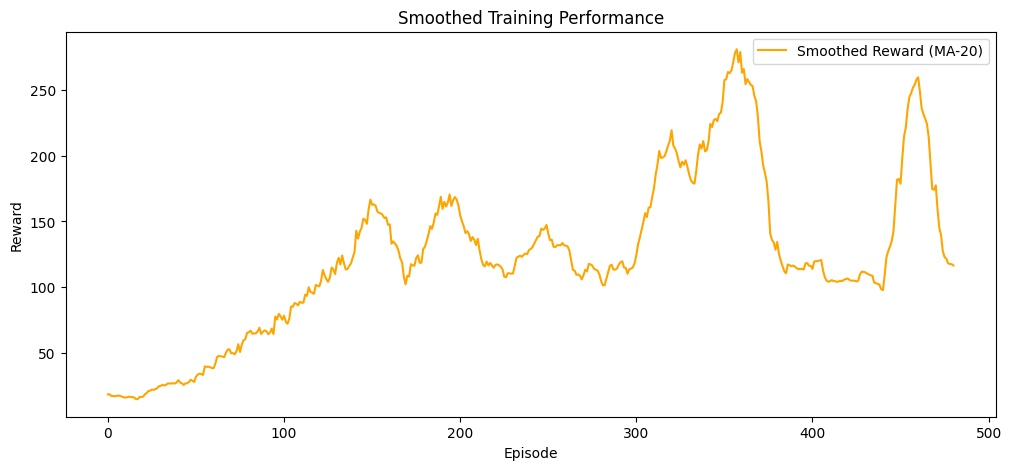

In [27]:
def moving_average(data, window=20):
    return np.convolve(data, np.ones(window)/window, mode='valid')

plt.figure(figsize=(12, 5))
plt.plot(moving_average(rewards_list), label='Smoothed Reward (MA-20)', color='orange')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Smoothed Training Performance')
plt.legend()
plt.show()


#  CartPole with Double Dueling DQN


In [ ]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import deque
import tensorflow as tf
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Lambda, Subtract, Add
from tensorflow.keras.optimizers import Adam

if not hasattr(np, 'bool'):
    np.bool = np.bool_

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)


In [ ]:
env1 = gym.make("CartPole-v1")
reset_result_1 = env1.reset()
state = reset_result_1[0] if isinstance(reset_result_1, tuple) else reset_result_1
state_size_1 = state.shape[0]
action_size_1 = env1.action_space.n


In [ ]:
def build_dueling_dqn(state_size, action_size, learning_rate=0.0005):
    inputs = Input(shape=(state_size,))
    x = Dense(64, activation='relu')(inputs)
    x = Dense(64, activation='relu')(x)
    value = Dense(1, activation='linear')(x)
    advantage = Dense(action_size, activation='linear')(x)
    advantage_mean = Lambda(lambda a: tf.reduce_mean(a, axis=1, keepdims=True))(advantage)
    advantage_centered = Subtract()([advantage, advantage_mean])
    q_values = Add()([value, advantage_centered])
    model_1 = Model(inputs=inputs, outputs=q_values)
    model_1.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model_1


In [33]:
class ReplayBuffer:
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)
    def add(self, state, action, reward, next_state, done):
        self.buffer.append((state, action, reward, next_state, done))
    def sample(self, batch_size):
        return random.sample(self.buffer, batch_size)
    def __len__(self):
        return len(self.buffer)


In [ ]:
buffer_capacity = 20000
replay_buffer = ReplayBuffer(buffer_capacity)

gamma = 0.99
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
batch_size = 64
episodes = 10
target_update_freq = 10

model_1 = build_dueling_dqn(state_size_1, action_size_1)
target_model_1 = build_dueling_dqn(state_size_1, action_size_1)
target_model_1.set_weights(model_1.get_weights())


In [ ]:
rewards_list_1 = []
loss_history_1 = []

for episode in range(1, episodes + 1):
    reset_result = env.reset()
    state = reset_result[0] if isinstance(reset_result, tuple) else reset_result
    state = np.reshape(state, [1, state_size])
    total_reward = 0
    done = False

    while not done:
        if np.random.rand() <= epsilon:
            action = random.randrange(action_size)
        else:
            q_values = model_1.predict(state, verbose=0)
            action = np.argmax(q_values[0])

        step_result = env.step(action)
        next_state, reward, done = step_result[:3]
        next_state = np.reshape(next_state, [1, state_size])
        replay_buffer.add(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if len(replay_buffer) >= batch_size:
            minibatch = replay_buffer.sample(batch_size)
            states = np.vstack([m[0] for m in minibatch])
            actions = np.array([m[1] for m in minibatch])
            rewards = np.array([m[2] for m in minibatch])
            next_states = np.vstack([m[3] for m in minibatch])
            dones = np.array([m[4] for m in minibatch]).astype(float)

            next_qs = model_1.predict(next_states, verbose=0)
            next_actions = np.argmax(next_qs, axis=1)
            target_qs = target_model_1.predict(next_states, verbose=0)
            targets = rewards + (1 - dones) * gamma * target_qs[np.arange(batch_size), next_actions]

            q_values = model_1.predict(states, verbose=0)
            for i, action in enumerate(actions):
                q_values[i][action] = targets[i]

            history = model_1.fit(states, q_values, epochs=1, verbose=0)
            loss_history_1.append(history.history['loss'][0])

    if epsilon > epsilon_min:
        epsilon *= epsilon_decay
    if episode % target_update_freq == 0:
        target_model_1.set_weights(model_1.get_weights())

    rewards_list_1.append(total_reward)
    if episode % 10 == 0:
        print(f"Episode {episode}/{episodes}, Avg Reward: {np.mean(rewards_list_1[-10:]):.2f}, Epsilon: {epsilon:.3f}")


Episode 10/10, Avg Reward: 24.60, Epsilon: 0.951


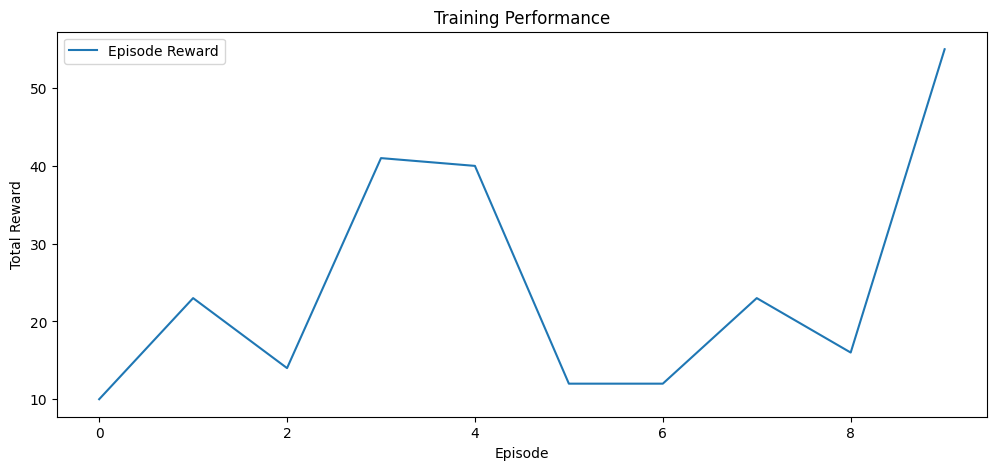

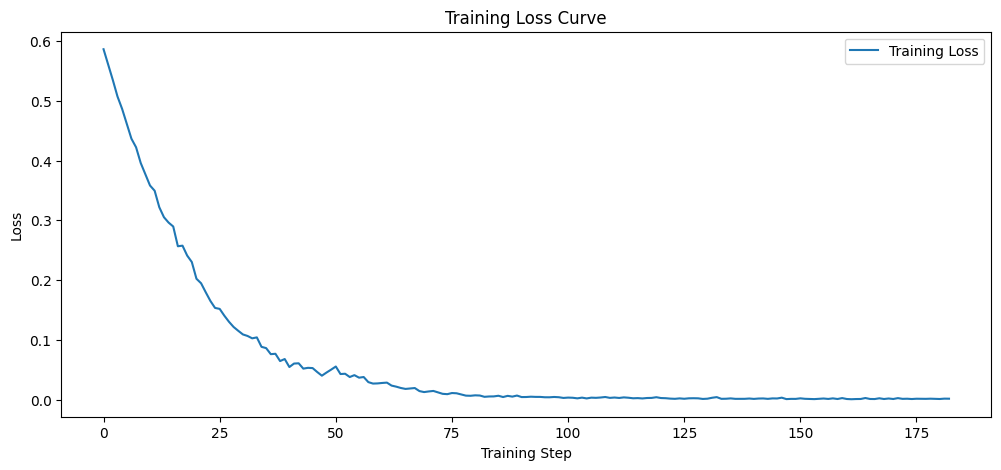

In [ ]:
model.save_weights('double_dueling_dqn_weights.h5')

plt.figure(figsize=(12, 5))
plt.plot(rewards_list_1, label="Episode Reward")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Training Performance")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(loss_history_1, label="Training Loss")
plt.xlabel("Training Step")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

